<a href="https://colab.research.google.com/github/abelva002/analyzing-game-sales-2016/blob/main/Final_Project_Ahmad_Belva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## FINAL PROJECT - Ahmad Belva

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Importing the Dataset (Game Sales With Ratings up-to 2016)

df_2016 = pd.read_csv('/content/drive/MyDrive/Tugas dibimbing/Final Project/Dataset/Video_Games_Sales_as_at_22_Dec_2016.csv/Video_Games_Sales_as_at_22_Dec_2016.csv')

In [ ]:
# Objective:

# To observe how different features affect how many game softwares are sold
# Create a model that can predict how many game software could be sold

In [ ]:
# Sampling some data for references purpose

df_2016.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
4028,The Price is Right,DS,2008.0,Misc,Ubisoft,0.46,0.00,0.00,0.04,0.49,NaN,NaN,tbd,NaN,Ludia Inc.,E
3294,Vanquish,PS3,2010.0,Shooter,Sega,0.21,0.21,0.11,0.08,0.61,84.0,61.0,8.1,304.0,PlatinumGames,M
9855,Rodea the Sky Soldier,WiiU,2015.0,Action,Nippon Ichi Software,0.08,0.02,0.01,0.01,0.12,45.0,31.0,6.5,81.0,"Prope, Kadokawa",E10+
15636,Katekyoo Hitman Reborn!! Let's Ansatsu!? Neraw...,PS2,2007.0,Action,Marvelous Interactive,0.00,0.00,0.02,0.00,0.02,NaN,NaN,NaN,NaN,NaN,NaN
15949,Dragon Booster,DS,2005.0,Shooter,Konami Digital Entertainment,0.02,0.00,0.00,0.00,0.02,33.0,14.0,7,9.0,Konami Computer Entertainment Hawaii,E


## EXPLORATORY DATA ANALYSIS (EDA)

In [ ]:
# General Information About the dataset

df_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [ ]:
# Identifying Missing Values for each column

df_2016.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [ ]:
# Data Pre-Processing / Missing Value Handling:

# Lets split the explanation into 2 parts, column Name ~ Global_Sales and column Critic_Score ~ Rating, because of the vastly different number of Missing Values.

# First Part [Name ~ Global_Sales]:
# Missing Values in this part is relatively low considering the amount of entry in the dataset and compared to Missing Values in the 2nd Part.
# Missing Values in Name column can be removed because those games are not identified
# Missing Values in Year_of_Release can will be imputed by mode.
# Missing Values in Genre can simply be imputed with 'Others', as with the case of Publisher column.

# Second Part [Critic_Score ~ Rating]:
# This part is complicated because the dataset mentions that all of these column is obtained from Metacritic.
# The problem is that some of the older games on the list predates that site.
# These missing values will be imputed based on the column's type and values. More on that later.



In [ ]:
# Missing Values Handling - Name
# As mentioned before, a total of 2 unidentified game will be droped from the data.

df_2016 = df_2016[~df_2016['Name'].isna()]

In [ ]:
# Missing Value Handling - Year_of_Release
# It is observed that this column has 269 Missing Value which equates to approximately 1.6% of the data
# Since the Missing Value is less than 5% of the data, Imputation with Mode will be done.

year_mode = df_2016['Year_of_Release'].mode().values[0]
df_2016['Year_of_Release'] = df_2016['Year_of_Release'].fillna(year_mode)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Missing Value Handling - Publisher
# As mentioned before, the Missing Value will be treated as the 'Other' category (newly impplemented value)

df_2016['Publisher'] = df_2016['Publisher'].fillna('Others')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Missing Value Handling - Critic Score
# Average of Score given by critics for the game
# As mentioned before, not all entry in the data have a Critic Score because the data is obtained from Metacritic.
# Since there are 8580 Missing Value (substantial), it couldn't just be purged.
# Therefore Missing Values will be imputed with value of '-1' meaning no Score was applicable.

df_2016['Critic_Score'] = df_2016['Critic_Score'].fillna(-1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [ ]:
# Missing Value Handling - Critic Count
# Critic Count is the number of critics giving score for the game
# As with Critic Score, games without that value will have Missing Values for Critic Count
# Since that was the case, it will be imputed by '0' since no critics were giving score for the game

df_2016['Critic_Count'] = df_2016['Critic_Count'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Missing Value Handling - User Score
# User Score is the average of score given by user for the game
# Similar to Critic_Score, there are substantial amount of Missing Value (6702)
# In addition to that, there are some 'tbd' value which means 'to be determined'. In this case it is the same as Missing Value.
# Like Critic_Score, value '-1' signifying no Score will be imputed to both Missing and 'tbd' values

df_2016['User_Score'] = df_2016['User_Score'].apply(lambda x: -1 if x == 'tbd' else x)
df_2016['User_Score'] = df_2016['User_Score'].fillna(-1)

df_2016['User_Score'] = pd.to_numeric(df_2016['User_Score'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# Missing Value Handling - User Count
# User Count is the number of users giving score for the game
# Similar with Critic Count, games without User Score will have Missing Values for User Count
# Since that was the case, it will be imputed by '0' since no users were giving score for the game

df_2016['User_Count'] = df_2016['User_Count'].fillna(0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
# Missing Value Handling - Developer
# Similar with Publisher, the Missing Value will be treated as the 'Other' category (newly impplemented value)

df_2016['Developer'] = df_2016['Developer'].fillna('Others')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
# Missing Value Handling - Rating
# Rating column has 6767 Missing Value which is a substantial amount (around 40% of the data).
# Since approximately 40% of the data are Missing, it's hard to justify using imputation (with Mode)
# Therefore, the column will not be used in the model.

df_2016['Rating'].value_counts()

E       3991
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: Rating, dtype: int64

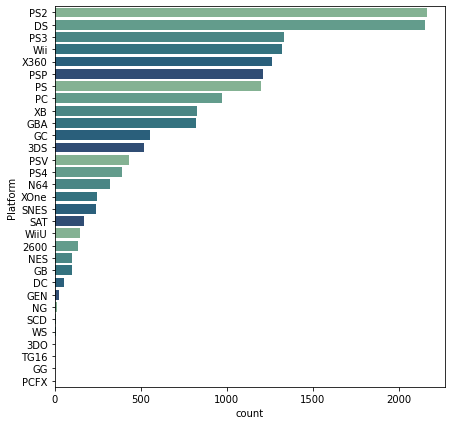

In [ ]:
# Exploring Feature - Platform

fig, ax = plt.subplots(figsize = (7,7))
sns.countplot(y = "Platform", data = df_2016, palette = (sns.color_palette('crest')), order = df_2016['Platform'].value_counts().index)

In [ ]:
# Insight:

# From the Platform distribution graph above, it could be seen that there are 31 gaming Platform in the dataset.
# Among those, PS2 and Nintendo DS were leading significantly (which mean that they have the most game)
# The next to note are PS3, X360, and Wii which were the 7th generation succeding PS2 and NDS (6th generation)
# It is very important to note that number of games produced past the 6th gen decrease significantly
# The reason is due to the increased complexity and cost to develop games on newer gen console
# The reason holds true for 8th gen console (PS4, PS Vita, XOne) and since they're fairly new (on 2016) making them have few entries in this dataset

In [ ]:
# Platform Countplot Simplified
# Top 10 will be retained while the rest will be condensed
# For 3DS, PSV, PS4, XOne, Wii U, will be condensed into 1 category: 'NextGen' (Past 2010)
# The rest will be condensed into 1 category: 'Others'

df_2016['Platform'].replace(to_replace = ['3DS', 'PSV', 'PS4', 'XOne', 'WiiU'], value = 'NextGen', inplace = True)
df_2016['Platform'].replace(to_replace = ['GC', 'N64', 'SNES', 'SAT', '2600', 'NES', 'GB', 'DC', 'GEN', 'NG', 'SCD', 'WS', '3DO', 'TG16', 'GG', 'PCFX'], value = 'Others', inplace = True)

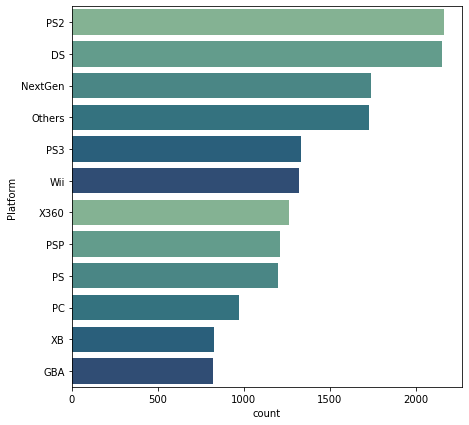

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
sns.countplot(y = "Platform", data = df_2016, palette = (sns.color_palette('crest')), order = df_2016['Platform'].value_counts().index)

# The Platform graph will be simpler and more neat

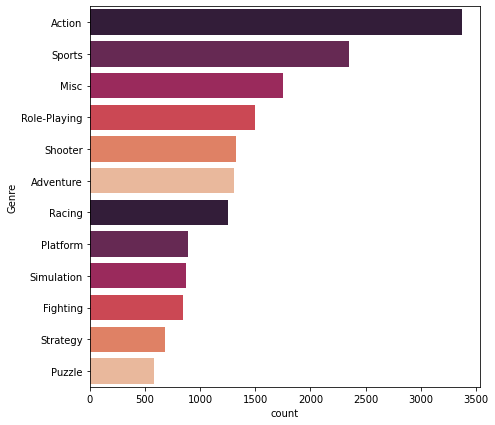

In [ ]:
# Exploring Feature - Genre

fig, ax = plt.subplots(figsize = (7,7))
sns.countplot(y = "Genre", data = df_2016, palette = (sns.color_palette('rocket')), order = df_2016['Genre'].value_counts().index)

In [ ]:
# Insight:

# There are 12 Genres in the dataset based on the graph above
# The most frequent was Action while the least was Puzzle
# It should be noted that Misc was comprised of many smaller Genres
# Action was the highest because it is one of the most common element included in a game, so many games are classified as action
# Due to yearly and multiplatform release tendency, Sport games took the 2nd place
# Role-Playing (RPG) was also fairly popular, followed by Adventure, Shooter, Racing which have relatively similar figure
# It should aslo be noted that some genres may have overlap like SRPG (Strategy/Simulation RPG), ARPG (Action RPG), Action Adventure, etc
# In this case, usually the most prominent element in the game is choosen
# The rest is on the relatively lower side (number of games) mostly because of said overlap (ex. most RPG / Adventure games has Puzzle elements)

In [ ]:
# Genre Countplot Simplified
# It's known that most game has multiple genre. As mentioned above, many genre overlap with each other.
# Therefore the top 6 will be retained while others will be integrated into the top 6 that has closest genre overlap with them.

# Using domain knowledge, the category will be decided:
# Racing -> Sport, because there are many people that include Racing as a category in sport
# Platform -> Action, based on Wikipedia (and some other source) Platform is categorized as a sub-genre of Action games
# Simulation -> Role-Playing, because in some Simulation games like 'Surgeon Simulator', 'Flight Simulator', and 'Goat Simulator', the player took a certain 'Role'
# Fighting -> Action, Fighting is a sub-genre of Action games
# Strategy -> Misc, Strategy is it's own main genre but since it has few games it will be placed in Misc
# Puzzle -> Misc, Puzzle is an uncommon for a game's main genre because puzzle elements are usually included in Action, Adventure, or Role-Playing

df_2016['Genre'].replace(to_replace = ['Racing'], value = 'Sports', inplace = True)
df_2016['Genre'].replace(to_replace = ['Platform', 'Fighting'], value = 'Action', inplace = True)
df_2016['Genre'].replace(to_replace = ['Simulation'], value = 'Role-Playing', inplace = True)
df_2016['Genre'].replace(to_replace = ['Strategy', 'Puzzle'], value = 'Misc', inplace = True)


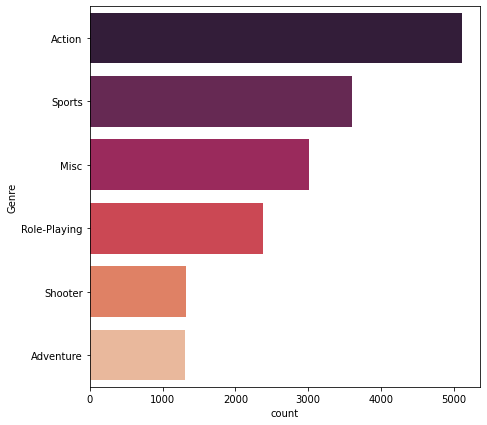

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
sns.countplot(y = "Genre", data = df_2016, palette = (sns.color_palette('rocket')), order = df_2016['Genre'].value_counts().index)

# The Genre graph is more compact and simple now

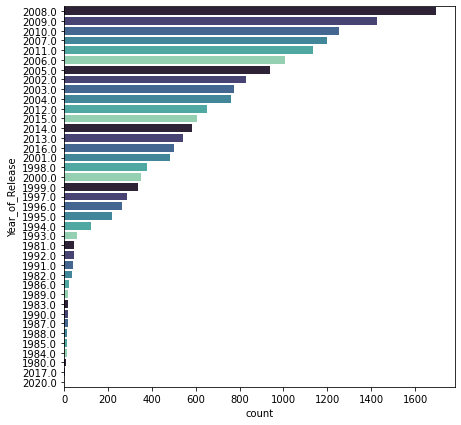

In [ ]:
# Exploring Features - Year of Release

fig, ax = plt.subplots(figsize = (7,7))
sns.countplot(y = "Year_of_Release", data = df_2016, palette = (sns.color_palette('mako')), order = df_2016['Year_of_Release'].value_counts().index)

In [ ]:
# Insight:
# Number of games produced during retro era (< 2000) is relatively small compared to modern era
# The number of games produced keeps increasing and peaked on 2008
# After that the number of game produced started to decline
# This can be attributed to the increased complexity and cost of developing games
# Therefore, while the average quality of game increases the number of game produced decreases

In [ ]:
# Exploring Features - Global Sales

df_2016[['Global_Sales']].describe()


,Global_Sales
count,16717.000000
mean,0.533462
std,1.547956
min,0.010000
25%,0.060000
50%,0.170000
75%,0.470000
max,82.530000


In [ ]:
# Insight:

# Since the Global Sales data is measured in Millions per unit, the values in Descriptive Statistics are greater than it seems to be
# It could be seen that Mean > Median significantly (which is apparent because of the Max Value), therefore the data in this feature is Positively Skewed
# The average sales of all games in the dataset is 533,462
# The least amount of game sold in the dataset is 10,000
# While most amount of game sold in the dataset is 82,530,000
# The Global Sales has very high variability as seen from the Standard Deviation. Especially compared to the values of mean, percentiles, max, and min. 

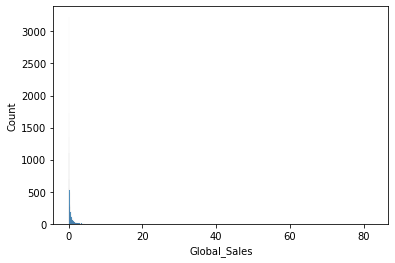

In [ ]:
# Histogram - Global Sales

sns.histplot(data = df_2016, x = 'Global_Sales')

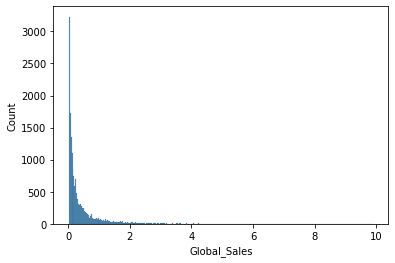

In [ ]:
# The result is very highly Positively Skewed as mentioned before.

# An effort to simplyfy the histogram will be made

simplified_df = df_2016[df_2016['Global_Sales'] < 10.0]
sns.histplot(data = simplified_df, x = 'Global_Sales')

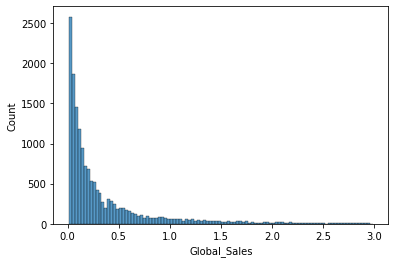

In [ ]:
# As seen in the graph, it is still highly skewed so an effort to further simplfy will be made

simplified_df = simplified_df[simplified_df['Global_Sales'] < 3.0]
sns.histplot(data = simplified_df, x = 'Global_Sales')

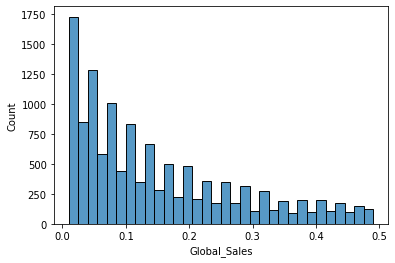

In [ ]:
# It has become clearer that most game sales in the dataset sold less than 500,000 units
# So it will be focused on that interval

simplified_df = simplified_df[simplified_df['Global_Sales'] < 0.5]
sns.histplot(data = simplified_df, x = 'Global_Sales')

In [ ]:
# Finally it has become clear that most game sales are concentrated below 200,000 units.
# There are 16,717 observation on the dataset and only the most well known games are getting 'high' sales.
# Then again, how 'high' a game sale is and it's success depends on the target set by the publisher / developer.

In [ ]:
# Exploring Features - Critic_Score

df_2016[['Critic_Score']].describe()

,Critic_Score
count,16717.000000
mean,33.056769
std,36.299296
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,70.000000
max,98.000000


In [ ]:
# Insight:

# The Critic Score is measured in the interval of 0 - 100
# It could be seen that since there are 8582 Missing Values (approx. 51% of the dataset) it is mostly populated by '-1' which means no score given
# As explained before, most retro games do not have Critic Score due to the data beign obtained from Metacritcs
# The same could be said towrds 'less popular' games or indie games, as Metacritics focuses mostly on popular and mainstream medias
# It resulted in the data to be Skewed, but despite Mean > Median significantly, it is not apparent if it's Positively / Negatively skewed.
# This is due to the nature of the data, it will be clearer in the following Histogram on Critic Score.
# The Standard Deviattion is relatively high at 36.3 as the score itself is on a per 100 scale
# Large amount of Missing Values contributes greatly towards this result

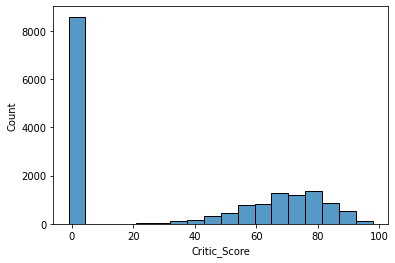

In [ ]:
# Histogram - Critic Score

sns.histplot(data = df_2016, x = 'Critic_Score')

In [ ]:
# As metioned above, due to high number of Missing Values, the data is highly skewed.
# But despite Mean > Median significantly, data is skewed towards '-1' which means Negatively Skewed
# This happens because the Missing Values comprised of approx. 51% of the data, hence becoming the 'dominant'
# This causes the data to be skewed towards '-1' due to their nature of being the 'dominant' in the dataset

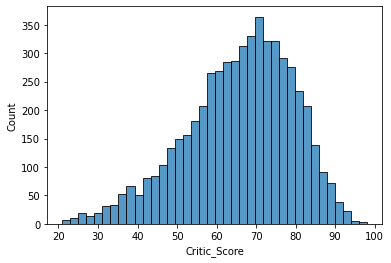

In [ ]:
# Now it will be seen only for non-missing data for reference purpose

simplified_df = simplified_df[simplified_df['Critic_Score'] > 20]
sns.histplot(data = simplified_df, x = 'Critic_Score')

In [ ]:
# It's quite surprising that the result is exactly the opposite, with the histogram forming a relatively normal but slightly skewed
# Let's see the Descriptive Statistics now

simplified_df[['Critic_Score']].describe()

,Critic_Score
count,5530.000000
mean,65.590235
std,13.383619
min,21.000000
25%,57.000000
50%,67.000000
75%,75.000000
max,98.000000


In [ ]:
# Exploring Features -  Critic Count

df_2016[['Critic_Count']].describe()

,Critic_Count
count,16717.000000
mean,12.831130
std,18.680383
min,0.000000
25%,0.000000
50%,0.000000
75%,21.000000
max,113.000000


In [ ]:
# Insight:

# It suffered from the same problem as Critic Score, which is similar amount of Missing Values (approx. 51% of the data)
# That's why the values are populated by '0' which means no people gave the game any score
# It also carry over the skewness problem, while Mean > Median, it's still negatively skewed due to the nature of Missing Values 'dominance'

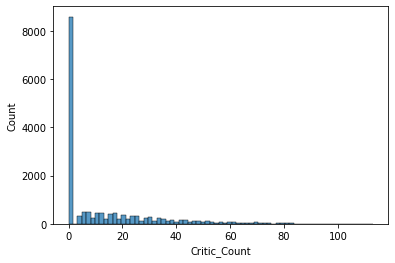

In [ ]:
# Histogram - Critic Count

sns.histplot(data = df_2016, x = 'Critic_Count')

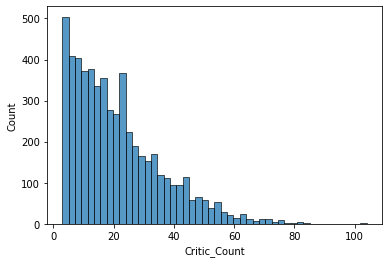

In [ ]:
# As predicted, it also falls to the same problem as Critic Score.
# It is Negatively Skewed due to the 'dominance' nature of Msiing Values.
# Next, it will be investigated for non-missing values only

simplified_df = simplified_df[simplified_df['Critic_Count'] > 1]
sns.histplot(data = simplified_df, x = 'Critic_Count')

In [ ]:
# Now it could be seen that the data is Postively Skewed which is in line with it's Descriptive Statistics

simplified_df[['Critic_Count']].describe()

,Critic_Count
count,5530.000000
mean,21.315913
std,14.595896
min,3.000000
25%,10.000000
50%,18.000000
75%,29.000000
max,104.000000


In [ ]:
# Exploring Features - User_Score

df_2016[['User_Score']].describe()

,User_Score
count,16717.000000
mean,2.689005
std,4.169779
min,-1.000000
25%,-1.000000
50%,-1.000000
75%,7.300000
max,9.700000


In [ ]:
# Insight:

# User score is measured in a scale of per 10 (0.0 - 10.0)
# As with the case of Critic Score, this feature was also filled with Missing values
# With 2425 values of 'tbd' (which will be trated as missing value) and 6704 actual missing values which made of approx. 54.6% of the data
# Since the missing value dominates the dataset, it also suffered same problem as Critic Score namely the skewness problem
# Furthermore, the Standard Deviation of 4.17 is relatively large for a score on a scale of 10

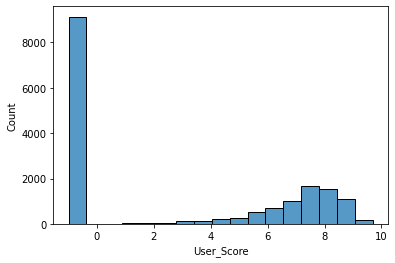

In [ ]:
# Histogram - User Score

sns.histplot(data = df_2016, x = 'User_Score')

In [ ]:
# As metioned above, due to high number of Missing Values, the data is highly skewed in the same vein as Critic Score.
# But despite Mean > Median, data is skewed towards '-1' which means Negatively Skewed
# This happens because the Missing Values comprised of approx. 54.6% of the data, hence becoming the 'dominant'
# This causes the data to be skewed towards '-1' due to their nature of being the 'dominant' in the dataset

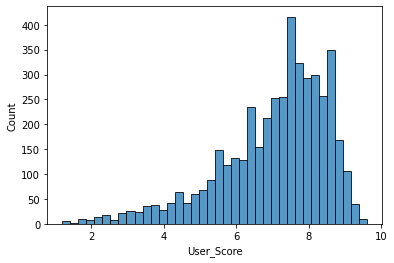

In [ ]:
# Now it will be seen only for non-missing data for reference purpose

simplified_df = simplified_df[simplified_df['User_Score'] > 1.0]
sns.histplot(data = simplified_df, x = 'User_Score')

In [ ]:
# Fairly similar result to Critic Score, with the histogram forming a slightly negatively skewed form
# Let's see the Descriptive Statistics now

simplified_df[['User_Score']].describe()

,User_Score
count,4500.000000
mean,7.032667
std,1.485167
min,1.200000
25%,6.275000
50%,7.400000
75%,8.100000
max,9.600000


In [ ]:
# Exploring Features -  User Count

df_2016[['User_Count']].describe()

,User_Count
count,16717.000000
mean,73.657056
std,386.717446
min,0.000000
25%,0.000000
50%,0.000000
75%,20.000000
max,10665.000000


In [ ]:
# Insight:

# It suffered from the same problem as Critic Count, with large amount of missing values approx. 54.6% of the dataset
# That's why the values are populated by '0' which means no people gave the game any score
# It also carry over the skewness problem, while Mean > Median, it's still negatively skewed due to the nature of Missing Values 'dominance'

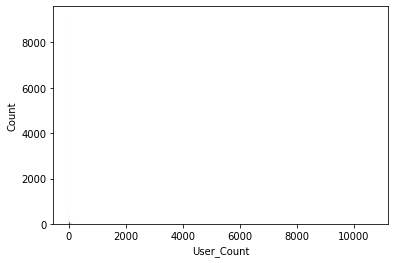

In [ ]:
# Histogram - Critic Count

sns.histplot(data = df_2016, x = 'User_Count')

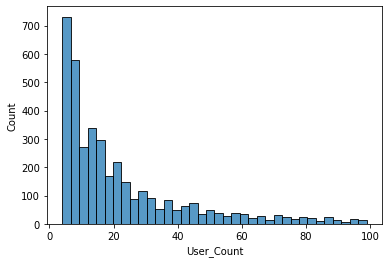

In [ ]:
# It is too Skewed to be seen
# Next, it will be simplified.

simplified_df = simplified_df[simplified_df['User_Count'] < 100]
sns.histplot(data = simplified_df, x = 'User_Count')

In [ ]:
# Now it could be seen that the data is Postively Skewed which is in line with it's Descriptive Statistics

simplified_df[['User_Count']].describe()

,User_Count
count,3863.000000
mean,22.245923
std,20.563982
min,4.000000
25%,8.000000
50%,15.000000
75%,29.000000
max,99.000000


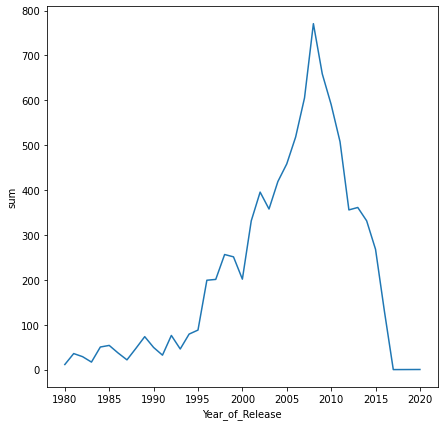

In [ ]:
# Lineplot - Global Sales VS Year of Release

fig, ax = plt.subplots(figsize = (7,7))
yearly_sales = df_2016.groupby(['Year_of_Release'])['Global_Sales'].agg(['sum'])

sns.lineplot(x = "Year_of_Release", y = "sum", data = yearly_sales)
#yearly_sales

In [ ]:
# Even though the data should only contain data up to 2016, there are some 'outlier' it seems. So the 'outlier' will be investigated.

df_2016[df_2016['Year_of_Release'] > 2016]

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
5936,Imagine: Makeup Artist,DS,2020.0,Role-Playing,Ubisoft,0.27,0.0,0.00,0.02,0.29,-1.0,0.0,-1.0,0.0,Ubisoft,E
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,NextGen,2017.0,Role-Playing,Sega,0.00,0.0,0.04,0.00,0.04,-1.0,0.0,-1.0,0.0,Others,NaN
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,NextGen,2017.0,Role-Playing,Sega,0.00,0.0,0.01,0.00,0.01,-1.0,0.0,-1.0,0.0,Others,NaN
16385,Brothers Conflict: Precious Baby,NextGen,2017.0,Action,Idea Factory,0.00,0.0,0.01,0.00,0.01,-1.0,0.0,-1.0,0.0,Others,NaN


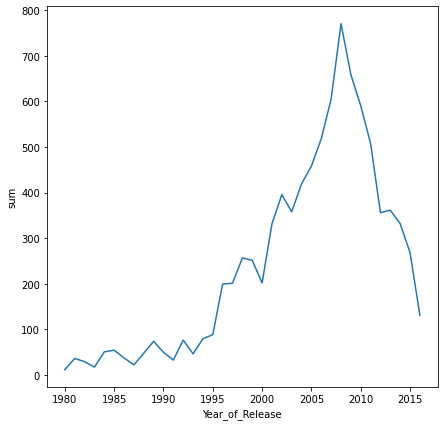

In [ ]:
# For the purpose of this analysis, the Year_of_Release of these 4 entries will be ajusted to 2016 (The 'supposed' maximum for the dataset)

df_2016.loc[df_2016['Year_of_Release'] > 2016, 'Year_of_Release'] = 2016

# The Global Sales Graph should be better now

fig, ax = plt.subplots(figsize = (7,7))
yearly_sales = df_2016.groupby(['Year_of_Release'])['Global_Sales'].agg(['sum'])

sns.lineplot(x = "Year_of_Release", y = "sum", data = yearly_sales)

# Note: It should be noted that there are not many data past 2015 in this dataset, hence the relatively sharp turn in Global Sales after 2015

In [ ]:
# Insight:

# Sales number of games produced during retro era (< 2000) is significantly smaller compared to modern era
# Starting from 1995, sales number of games produced keeps increasing (Uptrend) and peaked on 2008
# The information above is inline with Number of Game produced per Year mentioned before
# After 2008, there is a decline in sales number (Downtrend)
# There were many factors that influence this trend like: the increasing price of both console and games themselves, also the rise of mobile gaming
# Since the data in the dataset past 2015 is limited the performance seemed bad here
# The real data after 2016 is actually not that bad, as there are several high sellers like Persona 5, Spider-Man PS4, Horizon Zero Dawn, etc.


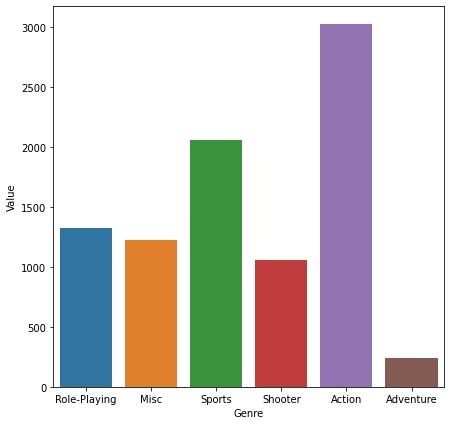

In [ ]:
# Barplot - Global Sales VS Genre

fig, ax = plt.subplots(figsize = (7,7))
genre_sales = df_2016.groupby(['Genre'])['Global_Sales'].agg(['sum'])
#genre_sales.loc['Action'][0]

Genre = []
Value = []
for genre in set(df_2016['Genre']):
  Genre.append(genre)
  Value.append(genre_sales.loc[genre][0])

dictionary1 = {"Genre": Genre, "Value": Value}
genre_sales2 = pd.DataFrame(dictionary1)
#genre_sales2

sns.barplot(x = "Genre", y = "Value", data = genre_sales2)

In [ ]:
# Insight:

# Action is the most popular genre, leading with approx. 3,000 sales, since the data is scale a Million per point, this is a great achievement
# Next is Sports with approx. 2,000 sales, same as above, considering the scale this is a great result
# Following Sports is Role-Playing with approx. 1,300 sales which is also great
# After that is the combination of genres in Misc. which managed approx. 1,200 sales with Shooter closing in on approx. 1,000 sales
# Last is Adventure with approx. 230 sales, which considering the scale, is still quite good

In [ ]:
# Exploring Feature - Publisher
# From all entries in the dataset there are 304 unique Publishers
# Because there were to many, 5 most productive Publishers will be selected for reference (Top 5 that produced most games)

top5_pbl = df_2016[df_2016['Publisher'].isin(['Electronic Arts', 'Activision', 'Namco Bandai Games', 'Ubisoft', 'Konami Digital Entertainment'])]

top5_pbl

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
31,Call of Duty: Black Ops 3,NextGen,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,-1.0,0.0,-1.0,0.0,Others,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16678,Tsukigime Ranko's Longest Day,PS3,2014.0,Action,Namco Bandai Games,0.00,0.01,0.00,0.00,0.01,-1.0,0.0,-1.0,0.0,Others,NaN
16681,Aikatsu Stars! My Special Appeal,NextGen,2016.0,Action,Namco Bandai Games,0.00,0.00,0.01,0.00,0.01,-1.0,0.0,-1.0,0.0,Others,NaN
16696,Metal Gear Solid V: Ground Zeroes,PC,2014.0,Action,Konami Digital Entertainment,0.00,0.01,0.00,0.00,0.01,80.0,20.0,7.6,412.0,Kojima Productions,M
16701,Bust-A-Move 3000,Others,2003.0,Misc,Ubisoft,0.01,0.00,0.00,0.00,0.01,53.0,4.0,-1.0,0.0,Taito Corporation,E


In [ ]:
# Publisher - Activision
# Top 10 Games

top5_pbl[top5_pbl['Publisher'] == 'Activision'].sort_values(['Global_Sales'], ascending = [False]).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
29,Call of Duty: Modern Warfare 3,X360,2011.0,Shooter,Activision,9.04,4.24,0.13,1.32,14.73,88.0,81.0,3.4,8713.0,"Infinity Ward, Sledgehammer Games",M
31,Call of Duty: Black Ops 3,NextGen,2015.0,Shooter,Activision,6.03,5.86,0.36,2.38,14.63,-1.0,0.0,-1.0,0.0,Others,NaN
32,Call of Duty: Black Ops,X360,2010.0,Shooter,Activision,9.70,3.68,0.11,1.13,14.61,87.0,89.0,6.3,1454.0,Treyarch,M
34,Call of Duty: Black Ops II,PS3,2012.0,Shooter,Activision,4.99,5.73,0.65,2.42,13.79,83.0,21.0,5.3,922.0,Treyarch,M
35,Call of Duty: Black Ops II,X360,2012.0,Shooter,Activision,8.25,4.24,0.07,1.12,13.67,83.0,73.0,4.8,2256.0,Treyarch,M
36,Call of Duty: Modern Warfare 2,X360,2009.0,Shooter,Activision,8.52,3.59,0.08,1.28,13.47,94.0,100.0,6.3,2698.0,Infinity Ward,M
37,Call of Duty: Modern Warfare 3,PS3,2011.0,Shooter,Activision,5.54,5.73,0.49,1.57,13.32,88.0,39.0,3.2,5234.0,"Infinity Ward, Sledgehammer Games",M
41,Call of Duty: Black Ops,PS3,2010.0,Shooter,Activision,5.99,4.37,0.48,1.79,12.63,88.0,58.0,6.4,1094.0,Treyarch,M
55,Call of Duty: Modern Warfare 2,PS3,2009.0,Shooter,Activision,4.99,3.64,0.38,1.60,10.60,94.0,67.0,6.3,2073.0,Infinity Ward,M
60,Call of Duty: Ghosts,X360,2013.0,Shooter,Activision,6.73,2.56,0.04,0.91,10.25,73.0,29.0,2.6,2117.0,Infinity Ward,M


In [ ]:
# Insight:

# Top 10 games from Activision were dominated by 'Call of Duty' franchise
# The sale numbers were very great ranging from 10,000,000 to 14,000,000 sales for those top 10 games
# Those top 10 games are from PS3 generation onwards (with PS3, X360, and a NextGen console, most likely PS4 or XOne, makin the list)
# The sale numbers are mostly concentrated in NA (North America) with EU (European Union) making significant contribution and Others making fairly good contribution
# On the other hand, JP (Japan) sales are relatively low compared to them, but given Japan's smaller number of population it's a fairly good results

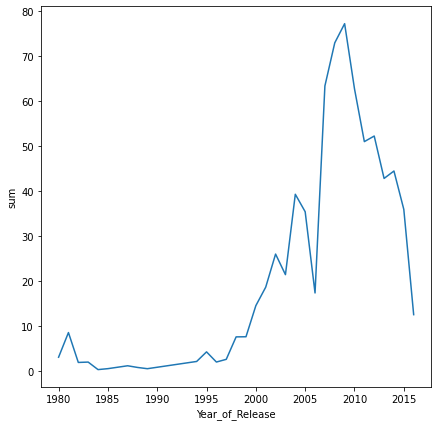

In [ ]:
# Publisher - Activision Yearly Sales

fig, ax = plt.subplots(figsize = (7,7))
yearly_sales = top5_pbl[top5_pbl['Publisher'] == 'Activision'].groupby(['Year_of_Release'])['Global_Sales'].agg(['sum'])

#yearly_sales
sns.lineplot(x = "Year_of_Release", y = "sum", data = yearly_sales)

In [ ]:
# Insight:

# Activision starts fairly smoothly going until 2000s
# It has made many games like the popular PS1 Spider-Man and it's sequel Spider-Man 2: Enter Electro
# Popularity starts to improve Uptrend after 2000
# Since then has made many games like Spider-man games and of course it's most popular franchise, Call of Duty
# Sales number peaked during PS3 era of Call of Duty with it still being popular nowadays 
# The sales after 2015 is because the lack of data, Activision is actually still doing really well on the market.

In [ ]:
# Publisher - Electronic Arts
# Top 10 Games

top5_pbl[top5_pbl['Publisher'] == 'Electronic Arts'].sort_values(['Global_Sales'], ascending = [False]).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
77,FIFA 16,NextGen,2015.0,Sports,Electronic Arts,1.12,6.12,0.06,1.28,8.57,82.0,42.0,4.3,896.0,EA Sports,E
81,FIFA Soccer 13,PS3,2012.0,Action,Electronic Arts,1.06,5.01,0.13,1.97,8.16,88.0,37.0,6.6,348.0,Electronic Arts,E
85,The Sims 3,PC,2009.0,Role-Playing,Electronic Arts,0.99,6.42,0.00,0.60,8.01,86.0,75.0,7.6,886.0,The Sims Studio,T
87,Star Wars Battlefront (2015),NextGen,2015.0,Shooter,Electronic Arts,2.99,3.49,0.22,1.28,7.98,-1.0,0.0,-1.0,0.0,Others,NaN
94,FIFA 17,NextGen,2016.0,Sports,Electronic Arts,0.66,5.75,0.08,1.11,7.59,85.0,41.0,5.0,398.0,"EA Sports, EA Vancouver",E
101,Battlefield 3,X360,2011.0,Shooter,Electronic Arts,4.46,2.11,0.06,0.69,7.32,84.0,57.0,7.4,2142.0,EA DICE,M
102,Need for Speed Underground,PS2,2003.0,Sports,Electronic Arts,3.27,2.83,0.08,1.02,7.20,85.0,33.0,8.6,171.0,EA Black Box,E
104,Battlefield 3,PS3,2011.0,Shooter,Electronic Arts,2.85,2.89,0.35,1.08,7.17,85.0,38.0,7.5,1761.0,EA DICE,M
113,Need for Speed Underground 2,PS2,2004.0,Sports,Electronic Arts,2.71,3.02,0.08,1.09,6.90,82.0,39.0,8.6,132.0,EA Canada,E
114,Medal of Honor: Frontline,PS2,2002.0,Shooter,Electronic Arts,2.93,2.75,0.17,0.99,6.83,88.0,29.0,8.5,135.0,EA LA,T


In [ ]:
# Insight:

# Top 10 games from EA was comprised of multiple franchise namely Star Wars, FIFA, The Sims, NFS, Battlefield, and Medal Of Honor
# The sale numbers were very great ranging from 6,800,000 to 8,500,000 sales for those top 10 games
# The sale numbers are mostly concentrated in EU (European Union) especially for FIFA with NA (North America) making significant contribution and Others making fairly good contribution
# On the other hand, JP (Japan) sales are fairly low even without comparison

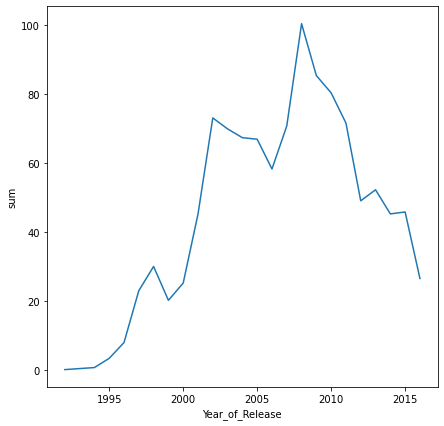

In [ ]:
# Publisher - EA Yearly Sales

fig, ax = plt.subplots(figsize = (7,7))
yearly_sales = top5_pbl[top5_pbl['Publisher'] == 'Electronic Arts'].groupby(['Year_of_Release'])['Global_Sales'].agg(['sum'])

#yearly_sales
sns.lineplot(x = "Year_of_Release", y = "sum", data = yearly_sales)

In [ ]:
# Insight:

# EA has been a major Publisher even during early days of video games
# EA has many popular gaming franchise, like FIFA, Star Wars, and The Sims, which make it capable of generating huge sales number
# EA has been growing uptrend steadily since the beginning
# Similar to Activision, sales peaked at around PS3 era, although EA is still a popular Publisher nowadays
# EA sales after 2015 is actually good, but due to the lack of data in this dataset it looked bad

In [ ]:
# Publisher - Namco Bandai Games
# Top 10 Games

top5_pbl[top5_pbl['Publisher'] == 'Namco Bandai Games'].sort_values(['Global_Sales'], ascending = [False]).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
266,Namco Museum,GBA,2001.0,Misc,Namco Bandai Games,3.00,1.11,0.05,0.07,4.24,79.0,10.0,7.3,6.0,Mass Media,E
297,Tekken Tag Tournament,PS2,2000.0,Action,Namco Bandai Games,1.68,1.51,0.51,0.35,4.05,85.0,25.0,8.5,117.0,Namco,T
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,Namco Bandai Games,2.08,1.35,0.00,0.54,3.98,61.0,21.0,-1.0,0.0,Digital Eclipse,E10+
303,The Witcher 3: Wild Hunt,NextGen,2015.0,Role-Playing,Namco Bandai Games,1.02,2.13,0.23,0.59,3.97,92.0,79.0,9.2,10179.0,CD Projekt Red Studio,M
315,Tekken 5,PS2,2005.0,Action,Namco Bandai Games,0.93,1.94,0.31,0.70,3.87,88.0,62.0,8.6,229.0,Namco,T
387,Tekken 4,PS2,2002.0,Action,Namco Bandai Games,1.55,1.27,0.33,0.29,3.44,79.0,23.0,8.3,126.0,Namco,T
453,World Class Track Meet,Others,1986.0,Sports,Namco Bandai Games,1.92,0.45,0.64,0.07,3.08,-1.0,0.0,-1.0,0.0,Others,NaN
548,Tekken 6,PS3,2009.0,Action,Namco Bandai Games,1.20,0.97,0.17,0.42,2.75,79.0,63.0,7.4,211.0,Namco Bandai Games,T
740,Pro Yakyuu Family Stadium,Others,1986.0,Sports,Namco Bandai Games,0.15,0.00,2.05,0.00,2.20,-1.0,0.0,-1.0,0.0,Others,NaN
822,R4: Ridge Racer Type 4,PS,1998.0,Sports,Namco Bandai Games,0.68,0.46,0.79,0.13,2.06,88.0,18.0,9.2,21.0,Namco,NaN


In [ ]:
# Insight:

# Top 10 comprised of various franchise like Namco's own retro collection, Tekken, and The Witcher
# Sales number for the top 10 games ranges from 2,000,000 to 4,200,000
# The top 10 games are mostly on PS2 and Retro Platform, with 1 Tekken entry on PS3 and The Witcher on NextGen (PS4)
# Sales performance are fairly good and balanced on NA, EU, JP, Others even if it's not as high as previous two Publisher

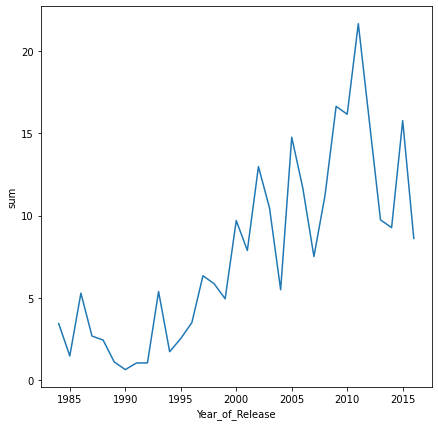

In [ ]:
# Publisher - Namco Bandai Games Yearly Sales

fig, ax = plt.subplots(figsize = (7,7))
yearly_sales = top5_pbl[top5_pbl['Publisher'] == 'Namco Bandai Games'].groupby(['Year_of_Release'])['Global_Sales'].agg(['sum'])

#yearly_sales
sns.lineplot(x = "Year_of_Release", y = "sum", data = yearly_sales)

In [ ]:
# Insight:

# Namco has been making games since retro era
# The graph is kind of spiky showing that Namco Bandai don't produce high sales games ever year, though when it does it usually performed rather well
# Namco Bandai also has several popular franchise like Tekken, Tales of, The Witcher, and Dark Souls
# Aside from that, Namco Bandai is the most prominent Publisher for anime games like Dragon Ball Z, Naruto, Gundam, and others
# Namco Bandai is still popular and has fairly good sales especially if they make a game of a currently popular anime like Demon Slayer: Hinokami Chronicles

In [ ]:
# Publisher - Ubisoft
# Top 10 Games

top5_pbl[top5_pbl['Publisher'] == 'Ubisoft'].sort_values(['Global_Sales'], ascending = [False]).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
61,Just Dance 3,Wii,2011.0,Misc,Ubisoft,5.95,3.11,0.00,1.06,10.12,74.0,15.0,7.8,16.0,Ubisoft,E10+
68,Just Dance 2,Wii,2010.0,Misc,Ubisoft,5.80,2.85,0.01,0.78,9.44,74.0,24.0,7.3,24.0,Ubisoft,E10+
103,Just Dance,Wii,2009.0,Misc,Ubisoft,3.48,2.99,0.00,0.73,7.20,49.0,21.0,8.0,110.0,Ubisoft Paris,E10+
116,Just Dance 4,Wii,2012.0,Misc,Ubisoft,4.05,2.16,0.00,0.55,6.76,74.0,10.0,7.3,28.0,Ubisoft,E10+
127,Assassin's Creed III,PS3,2012.0,Action,Ubisoft,2.64,2.52,0.16,1.12,6.45,85.0,41.0,6.9,1307.0,Ubisoft,M
159,Assassin's Creed II,PS3,2009.0,Action,Ubisoft,2.54,1.93,0.21,0.86,5.55,91.0,70.0,8.6,1202.0,Ubisoft Montreal,M
160,Assassin's Creed,X360,2007.0,Adventure,Ubisoft,3.28,1.64,0.07,0.56,5.54,81.0,77.0,7.7,1074.0,Ubisoft Montreal,M
176,Assassin's Creed III,X360,2012.0,Action,Ubisoft,3.13,1.69,0.03,0.44,5.29,84.0,61.0,6.7,1196.0,Ubisoft,M
181,Assassin's Creed II,X360,2009.0,Action,Ubisoft,3.11,1.55,0.08,0.51,5.26,90.0,82.0,8.8,1305.0,Ubisoft Montreal,M
219,Assassin's Creed,PS3,2007.0,Adventure,Ubisoft,1.91,2.00,0.09,0.82,4.82,81.0,40.0,7.3,769.0,Ubisoft Montreal,M


In [ ]:
# Insight:

# The top 10 are dominated by Assassin's Creed and Just Dance
# Sales number for top 10 games ranges from 4,800,000 to 10,120,000
# Platforms for those top 10 games are all from 7th generation (PS3, X360, Wii era)
# Sales is heavily concentrated on NA with signigficant contribution from EU and Others while JP sales were very low

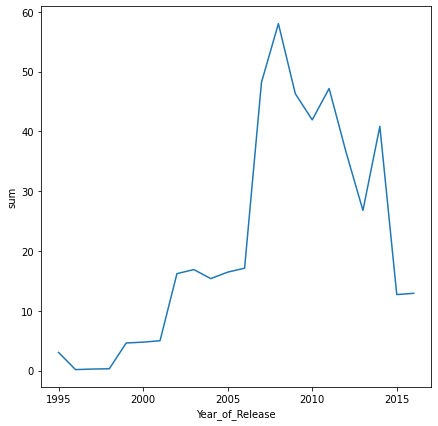

In [ ]:
# Publisher - Ubisoft Yearly Sales

fig, ax = plt.subplots(figsize = (7,7))
yearly_sales = top5_pbl[top5_pbl['Publisher'] == 'Ubisoft'].groupby(['Year_of_Release'])['Global_Sales'].agg(['sum'])

#yearly_sales
sns.lineplot(x = "Year_of_Release", y = "sum", data = yearly_sales)

In [ ]:
# Insight:

# Ubisoft starts samll before growing uptrend past the year 2000
# It had a sharp growth during PS3 era where Assassin's Creed was created, AC's popularity greately improved Ubisoft sales performance
# Aside from the AC series and Just Dance, Ubisoft has many other popular franchise like Far Cry, Watch Dogs, and Rayman
# Ubisoft is still a great Publisher with good sales performance nowadays, since the data pas 2015 is limited it is not reflected here

In [ ]:
# Publisher - Konami Digital Entertainment
# Top 10 Games

top5_pbl[top5_pbl['Publisher'] == 'Konami Digital Entertainment'].sort_values(['Global_Sales'], ascending = [False]).head(10)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
144,Metal Gear Solid 2: Sons of Liberty,PS2,2001.0,Action,Konami Digital Entertainment,2.45,2.01,0.87,0.72,6.05,96.0,42.0,8.7,1026.0,KCEJ,M
146,Metal Gear Solid,PS,1998.0,Action,Konami Digital Entertainment,3.18,1.83,0.78,0.24,6.03,94.0,20.0,9.4,918.0,KCEJ,M
147,Metal Gear Solid 4: Guns of the Patriots,PS3,2008.0,Action,Konami Digital Entertainment,2.63,1.71,0.83,0.82,5.99,94.0,82.0,8.7,3558.0,Kojima Productions,M
250,Winning Eleven: Pro Evolution Soccer 2007,PS2,2006.0,Sports,Konami Digital Entertainment,0.10,2.39,1.05,0.86,4.39,86.0,19.0,8.9,33.0,Konami,E
268,Metal Gear Solid 3: Snake Eater,PS2,2004.0,Action,Konami Digital Entertainment,1.46,0.00,0.83,1.93,4.23,91.0,68.0,9.3,955.0,KCEJ,M
291,World Soccer Winning Eleven 9,PS2,2005.0,Sports,Konami Digital Entertainment,0.12,2.26,0.90,0.77,4.06,-1.0,0.0,8.2,23.0,Konami,E
319,World Soccer Winning Eleven 8 International,PS2,2004.0,Sports,Konami Digital Entertainment,0.16,1.89,1.12,0.68,3.85,91.0,26.0,9.1,38.0,KCET,E
349,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.63,82.0,10.0,7.9,38.0,Konami,E
390,Metal Gear Solid V: The Phantom Pain,NextGen,2015.0,Action,Konami Digital Entertainment,1.09,1.36,0.49,0.48,3.41,93.0,86.0,8.2,3943.0,"Kojima Productions, Moby Dick Studio",M
478,World Soccer Winning Eleven 6 International,PS2,2002.0,Sports,Konami Digital Entertainment,0.12,1.26,1.16,0.45,2.99,93.0,24.0,9.1,65.0,KCET,E


In [ ]:
# Insight:

# Top 10 is populated by Metal Gear and Winning Eleven franchise
# Sales number for those top 10 games ranges from 2,990,000 to 6,050,000
# Platform for those top 10 games are mostly on PS2 with the original MGS on PS, MGS 4 on PS3, and MGS V on NextGen (PS4)
# The sales figures are high across all regions for MGS titles but WE titles are quite low on NA (probably because of FIFA)

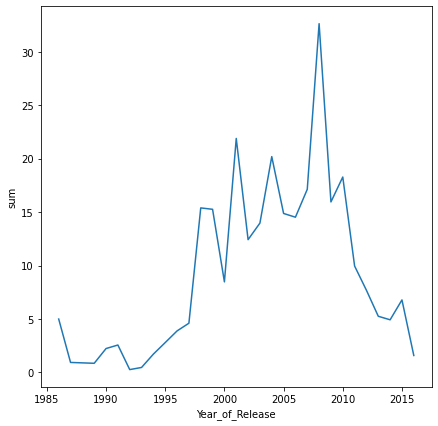

In [ ]:
# Publisher - Konami Yearly Sales

fig, ax = plt.subplots(figsize = (7,7))
yearly_sales = top5_pbl[top5_pbl['Publisher'] == 'Konami Digital Entertainment'].groupby(['Year_of_Release'])['Global_Sales'].agg(['sum'])

#yearly_sales
sns.lineplot(x = "Year_of_Release", y = "sum", data = yearly_sales)

In [ ]:
# Insight:

# Konami has been making games from retro era with a fairly steady growth
# Konami become more popular when MGS, WE, and YuGiOh were released and sales figures starts to improve, since then these 3 franchise has been Konami's main franchise
# Uptrend spikes in the graph usually means that an MGS game is released MGS 2 (2001), MGS 3 (2004), MGS 4 (2008)
# However, unlike other previous Publishers, Konami has been declining since Hideo Kojima left and found his own company (Kojima-Production) and has since mostly focused on YuGiOh only 

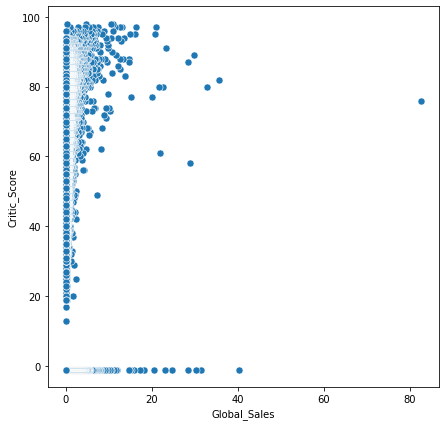

In [ ]:
# Scatterplot - Critic Score VS Global Sales

fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(x = 'Global_Sales', y = 'Critic_Score', data = df_2016, s = 50)

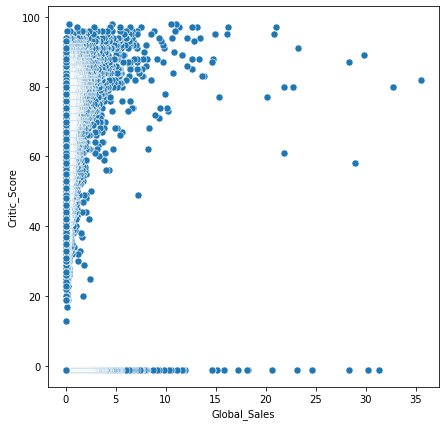

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(x = 'Global_Sales', y = 'Critic_Score', data = df_2016[df_2016['Global_Sales'] < 40], s = 50)

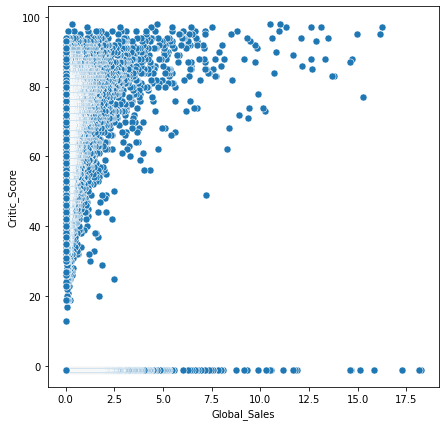

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(x = 'Global_Sales', y = 'Critic_Score', data = df_2016[df_2016['Global_Sales'] < 20], s = 50)

In [ ]:
# Insight:

# There are very high number of observations where higher Critic Score translated to higher Global Sales
# However for the missing values with '-1' scores, there are also many that managed to have a good Global Sales Performance
# For non-missing values though it could be said that Critic Score and Global Sales are Positively Correlated 

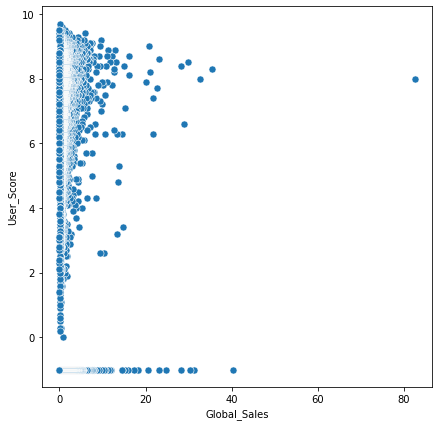

In [ ]:
# Scatterplot - User Score VS Global Sales

fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(x = 'Global_Sales', y = 'User_Score', data = df_2016, s = 50)

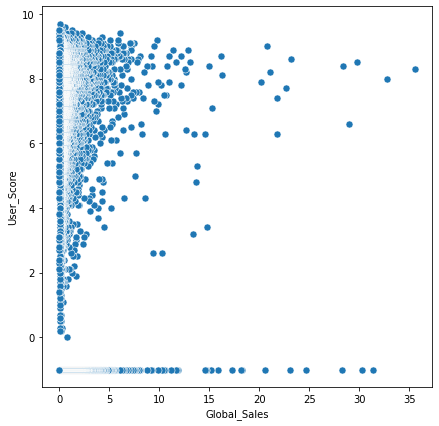

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(x = 'Global_Sales', y = 'User_Score', data = df_2016[df_2016['Global_Sales'] < 40], s = 50)

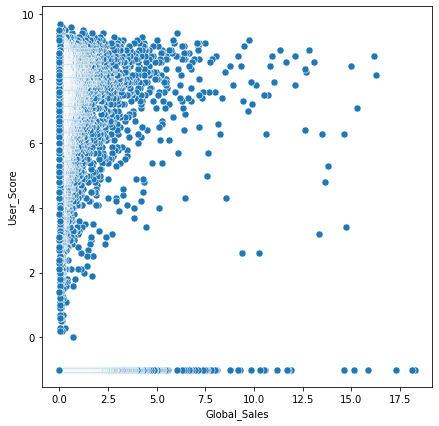

In [ ]:
fig, ax = plt.subplots(figsize = (7,7))
sns.scatterplot(x = 'Global_Sales', y = 'User_Score', data = df_2016[df_2016['Global_Sales'] < 20], s = 50)

In [ ]:
# Insight:

# Many observations shows the same result as Critic Score, which was Positive Correlation with Global Sales, but here to a lesser extent
# On the other hand there are some low User Score that managed to have good Global Sales, but since the numbers are lower than high User Score and good Global Sales then it is trated as exception rather than rule
# So it could be said that User Score is slightly positively correlated with Global Sales

In [ ]:
df_2016.isna().sum()

Name                  0
Platform              0
Year_of_Release       0
Genre                 0
Publisher             0
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score          0
Critic_Count          0
User_Score            0
User_Count            0
Developer             0
Rating             6767
dtype: int64

In [ ]:
# Checking for Duplicate Rows

df_2016.duplicated().sum()

5

In [ ]:
# Purge Duplicated Rows

df_2016 = df_2016.drop_duplicates()
df_2016.duplicated().sum()

0

## BASELINE MODEL - DECISION TREE

In [ ]:
# Decision Tree Regressor will be created as a baseline model
# The columns / features selected are those with numerical values
# Therefore columns / features with categorical values will not be used in this baseline model

from sklearn.tree import DecisionTreeRegressor

dt_regressor = DecisionTreeRegressor(random_state = 1)

X_base = df_2016[['Year_of_Release', 'User_Score', 'User_Count', 'Critic_Score', 'Critic_Count']]
y_base = df_2016[['Global_Sales']].to_numpy()
y_base = y_base.reshape(len(y_base),)

X_base

,Year_of_Release,User_Score,User_Count,Critic_Score,Critic_Count
0,2006.0,8.0,322.0,76.0,51.0
1,1985.0,-1.0,0.0,-1.0,0.0
2,2008.0,8.3,709.0,82.0,73.0
3,2009.0,8.0,192.0,80.0,73.0
4,1996.0,-1.0,0.0,-1.0,0.0
...,...,...,...,...,...
16714,2016.0,-1.0,0.0,-1.0,0.0
16715,2006.0,-1.0,0.0,-1.0,0.0
16716,2016.0,-1.0,0.0,-1.0,0.0
16717,2003.0,-1.0,0.0,-1.0,0.0


In [ ]:
# Splitting The Dataset into Training Data and Test Data
# The split: 80% of Training Data and 20% of Test Data

from sklearn.model_selection import train_test_split

X_base_train, X_base_test, y_base_train, y_base_test = train_test_split(X_base, y_base, test_size = 0.2, random_state = 1)

In [ ]:
# Training the model plus Hyperparameter Tuning
# Hyperparameters Tuned:  Maximum depth of the tree

from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': (1,2,3,4,5)
}

dt_gridCV = GridSearchCV(dt_regressor, parameters, cv = 5, scoring = 'neg_root_mean_squared_error')
dt_gridCV.fit(X_base_train, y_base_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=1),
             param_grid={'max_depth': (1, 2, 3, 4, 5)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Training Result

cv_base_result = pd.DataFrame(dt_gridCV.cv_results_)
final_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_base_result[final_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
3,{'max_depth': 4},-1.442837,1
2,{'max_depth': 3},-1.454588,2
1,{'max_depth': 2},-1.477690,3
0,{'max_depth': 1},-1.499434,4
4,{'max_depth': 5},-1.709903,5


In [ ]:
# From the result, it could be seen that the best model ustilize max_depth = 4 with mean_test_score = -1.443
# Therefore the best baseline model is Decision Tree which has maximum depth of 4

In [ ]:
# Evaluation Metrics - Mean Absolute Error

from sklearn.metrics import mean_absolute_error
y_base_pred = dt_gridCV.best_estimator_.predict(X_base_test)
mean_absolute_error(y_base_test, y_base_pred)

0.5060828784407441

In [ ]:
# The MAE result above shows that the model prediction deviates the true Global_Sales by 0.506

In [ ]:
from sklearn.metrics import mean_squared_error
y_base_pred = dt_gridCV.best_estimator_.predict(X_base_test)
np.sqrt(mean_squared_error(y_base_test, y_base_pred))

1.3219523946334337

In [ ]:
# The RMSE result above shows that the standard deviation of prediction errors is 1.322

In [ ]:
# Evaluation Metrics - R2 Score

from sklearn.metrics import r2_score
y_base_pred = dt_gridCV.best_estimator_.predict(X_base_test)
r2_score(y_base_test, y_base_pred)

0.13701899335361145

In [ ]:
# The result represent 0.137 of variance in the dataset that has been explained by the independent variable in the model.

## PREPARING THE DATASET

In [ ]:
# The features used in the modelling process are:
# Predictor: Genre, Platform, Year_of_Release, Critic_Score, Critic_Count, User_Score, User_Counts
# Target: Global_Sales

In [ ]:
# Converting Categorical Data (One-Hot Encoding)

OneHot_Cols = ['Genre', 'Platform']

for col in OneHot_Cols:
  data1 = pd.get_dummies(df_2016[[col]])
  data2 = df_2016.drop(columns = col)

  df_2016 = pd.concat([data1, data2], axis = 1)

In [ ]:
# Assembling Predictors and Target

X = df_2016.drop(columns = ['Name', 'Publisher', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales', 'Developer', 'Rating'])
y = df_2016[['Global_Sales']].to_numpy()
y = y.reshape(len(y),)

X

,Platform_DS,Platform_GBA,Platform_NextGen,Platform_Others,Platform_PC,Platform_PS,Platform_PS2,Platform_PS3,Platform_PSP,Platform_Wii,...,Genre_Adventure,Genre_Misc,Genre_Role-Playing,Genre_Shooter,Genre_Sports,Year_of_Release,Critic_Score,Critic_Count,User_Score,User_Count
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,2006.0,76.0,51.0,8.0,322.0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1985.0,-1.0,0.0,-1.0,0.0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,2008.0,82.0,73.0,8.3,709.0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,2009.0,80.0,73.0,8.0,192.0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1996.0,-1.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,2016.0,-1.0,0.0,-1.0,0.0
16715,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,2006.0,-1.0,0.0,-1.0,0.0
16716,0,0,1,0,0,0,0,0,0,0,...,1,0,0,0,0,2016.0,-1.0,0.0,-1.0,0.0
16717,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,2003.0,-1.0,0.0,-1.0,0.0


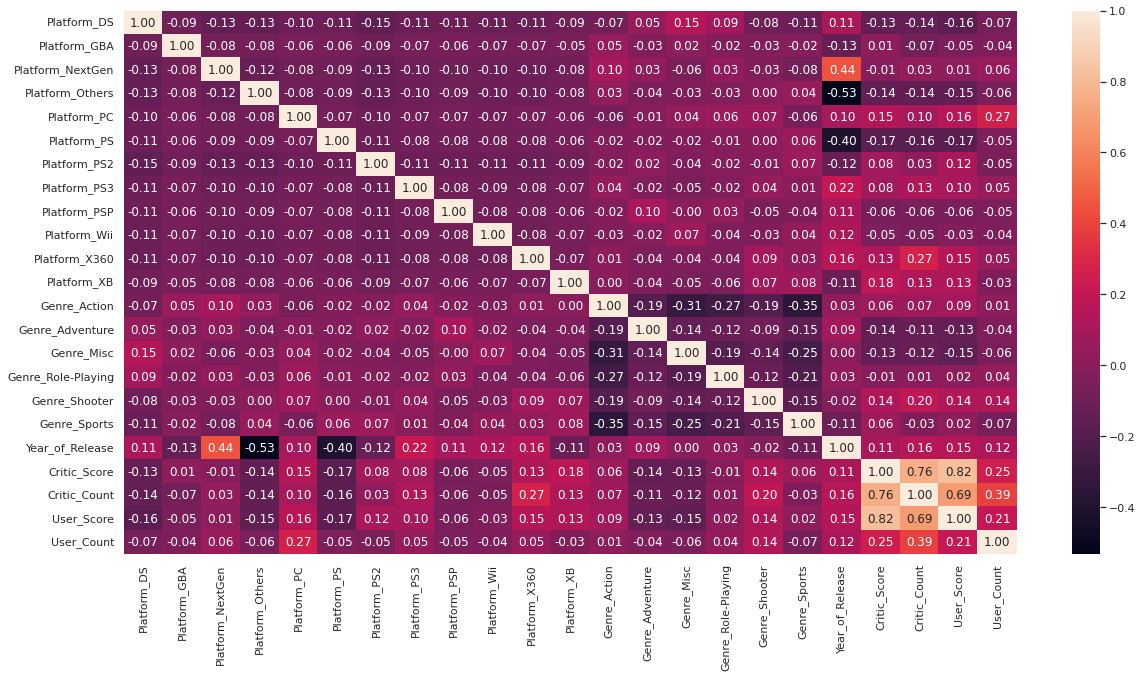

In [ ]:
# Checking Correlation for any Multicollinearity

correlation = X.corr()
sns.set(rc = {'figure.figsize':(20,10)})
sns.heatmap(correlation, annot = True, fmt = '.2f')

In [ ]:
# The threshold for absolute correlation will be set on 0.8
# It means that any correlation values with: absolute(corrleation) >= 0.8 will have to be removed because it's determined to be highly correlated
# In this case, it could be seen that Critic_Score and User_Score are highly correlated
# After calculating correlations between Critic_Score and Global_Sales it is obtained that the correlation is 0.15
# After calculating correlations between User_Score and Global_Sales it is obtained that the correlation is 0.14
# Therefore, Critic_Score will be kept because it's more correlated to the target variable

X = X.drop(columns = ['User_Score'])

In [ ]:
# Splitting The Dataset into Training Data and Test Data
# The split: 80% of Training Data and 20% of Test Data

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

## MODEL 1 - RANDOM FOREST

In [ ]:
# Define Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state = 1)

In [ ]:
# Training the model plus Hyperparameter Tuning
# Hyperparameters Tuned: Number of (Decision) Tree Estimators and their maximum depth

from sklearn.model_selection import GridSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth': (1,2,3,4,5)
}

rf_gridCV = GridSearchCV(rf_model, parameters, cv = 5, scoring = 'neg_root_mean_squared_error')
rf_gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=1),
             param_grid={'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Training Result

cv_result = pd.DataFrame(rf_gridCV.cv_results_)
final_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_result[final_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
22,"{'max_depth': 5, 'n_estimators': 30}",-1.314757,1
23,"{'max_depth': 5, 'n_estimators': 40}",-1.317625,2
21,"{'max_depth': 5, 'n_estimators': 20}",-1.320355,3
24,"{'max_depth': 5, 'n_estimators': 50}",-1.321899,4
15,"{'max_depth': 4, 'n_estimators': 10}",-1.321901,5
20,"{'max_depth': 5, 'n_estimators': 10}",-1.322351,6
17,"{'max_depth': 4, 'n_estimators': 30}",-1.326389,7
16,"{'max_depth': 4, 'n_estimators': 20}",-1.327587,8
18,"{'max_depth': 4, 'n_estimators': 40}",-1.331213,9
19,"{'max_depth': 4, 'n_estimators': 50}",-1.335732,10


In [ ]:
# From the table above, it is obtained that the best model utilize max_depth = 5 and n_estimator = 30 with mean_test_score of -1.314
# In other words, the best model is comprised of 30 (Decision) Tree Estimators with each Estimators having maximum depth of 5

In [ ]:
# Evaluation Metrics - Mean Absolute Error

from sklearn.metrics import mean_absolute_error
y_pred = rf_gridCV.best_estimator_.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.4545284004442768

In [ ]:
# The MAE result above shows that the model prediction deviates the true Global_Sales by 0.455

In [ ]:
# Evaluation Metrics - (Root) Mean Squared Error

from sklearn.metrics import mean_squared_error
y_pred = rf_gridCV.best_estimator_.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.249576736352139

In [ ]:
# The RMSE result above shows that the standard deviation of  prediction errors is 1.25

In [ ]:
# Evaluation Metrics - R2 Score

from sklearn.metrics import r2_score
y_pred = rf_gridCV.best_estimator_.predict(X_test)
r2_score(y_test, y_pred)

0.22892704952121035

In [ ]:
# The result represent 0.229 of variance in the dataset that has been explained by the independent variable in the model.

## MODEL 2 - GRADIENT BOOSTED TREE

In [ ]:
# Define Gradient Boosting Regressor

from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(random_state = 1)

In [ ]:
# Training the model plus Hyperparameter Tuning
# Hyperparameters Tuned: Number of (Decision) Tree Estimators, maximum depth, and learning rate

from sklearn.model_selection import GridSearchCV

parameters = {
    'learning_rate': (0.1,0.2,0.3,0.4,0.5),
    'n_estimators': (10,20,30,40,50),
    'max_depth': (1,2,3,4,5)
}

gb_gridCV = GridSearchCV(gb_model, parameters, cv = 5, scoring = 'neg_root_mean_squared_error')
gb_gridCV.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=1),
             param_grid={'learning_rate': (0.1, 0.2, 0.3, 0.4, 0.5),
                         'max_depth': (1, 2, 3, 4, 5),
                         'n_estimators': (10, 20, 30, 40, 50)},
             scoring='neg_root_mean_squared_error')

In [ ]:
# Training Result

cv_result = pd.DataFrame(gb_gridCV.cv_results_)
final_cols = ['params', 'mean_test_score', 'rank_test_score']
cv_result[final_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
24,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.288328,1
23,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.289536,2
47,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",-1.293483,3
22,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",-1.293918,4
46,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",-1.294757,5
...,...,...,...
2,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",-1.449839,121
5,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",-1.451140,122
25,"{'learning_rate': 0.2, 'max_depth': 1, 'n_esti...",-1.460339,123
1,"{'learning_rate': 0.1, 'max_depth': 1, 'n_esti...",-1.462566,124


In [ ]:
# From the table above, it is obtained that the best model utilize learning_rate = 0.1, max_depth = 5, and n_estimator = 50 with mean_test_score of -1.288
# In other words, the best model is comprised of 50 (Decision) Tree Estimators with each Estimators having maximum depth of 5 and learning rate of 0.1

In [ ]:
# Evaluation Metrics - Mean Absolute Error

from sklearn.metrics import mean_absolute_error
y_pred = gb_gridCV.best_estimator_.predict(X_test)
mean_absolute_error(y_test, y_pred)

0.4386987292797033

In [ ]:
# The MAE result above shows that the model prediction deviates the true Global_Sales by 0.439

In [ ]:
# Evaluation Metrics - (Root) Mean Squared Error

from sklearn.metrics import mean_squared_error
y_pred = gb_gridCV.best_estimator_.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

1.2984448760891136

In [ ]:
# The RMSE result above shows that the standard deviation of prediction errors is 1.298

In [ ]:
# Evaluation Metrics - R2 Score

from sklearn.metrics import r2_score
y_pred = gb_gridCV.best_estimator_.predict(X_test)
r2_score(y_test, y_pred)

0.1674378951970935

In [ ]:
# The result represent 0.167 of variance in the dataset that has been explained by the independent variable in the model.

In [ ]:
# Conclusion:

# Comparing the MAE results it's obtained that: Gradient Boosted Tree (0.439) and Random Forest (0.455) both improved upon the baseline Decision Tree (0.506)
# Comparing RMSE results it's obtained that: Gradient Boosted Tree (1.298) an d Random Forest (1.25) both slightly improved upon baseline Decision Tree (1.322)
# Finally, R2 score shows that Random Forest (0.229) explains variance in the dataset the best followed by Gradient Boosted Tree (0.167) with both imporing upon baseline Decision Tree (0.137)

# Next question: why the result is 'not that great'?
# The reason is because the Global Sales has relatively high variability in the dataset as seen by it's Standard Deviation (approx. 1.5 in Millions)
# Furthermore, there just aren't enough marketing data to represent features that more closely correlates to Global Sales
# Therefore, in that sense the result, while not amazing, is a fairly good estimation based on the available data.